# BRB Beam monitor data

2025/04/12

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats
from   scipy             import optimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [70]:
import re
import glob
from collections import namedtuple

import sys
pypaths= ("/Users/hernando/work/investigacion/NEXT/software/hipy",
         "/Users/hernando/work/investigacion/HK/WCTE/software/WCTE25")
for ipypath in pypaths:
       sys.path.insert(0,ipypath)


In [5]:
import hipy.utils        as ut
import hipy.pltext       as pltext

In [71]:
for p in sys.path: print(p)

/Users/hernando/work/investigacion/HK/WCTE/software/WCTE25
/Users/hernando/work/investigacion/NEXT/software/hipy
/Users/hernando/work/investigacion/HK/WCTE/software/WCTE
/Users/hernando/work/investigacion/NEXT/software/hipy
/Users/hernando/work/investigacion/HK/WCTE/software/WCTE
/Users/hernando/work/investigacion/NEXT/software/hipy
/Users/hernando/work/investigacion/HK/WCTE/software/WCTE25/NB
/Users/hernando/miniconda/envs/IC-3.7-2020-06-16/lib/python37.zip
/Users/hernando/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7
/Users/hernando/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/lib-dynload

/Users/hernando/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages
/Users/hernando/work/investigacion/NEXT/software/IC23
/Users/hernando/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/IPython/extensions
/Users/hernando/.ipython


In [73]:
import wcte.brbtools as brbtools

### Load data

In [74]:
path_data = "/Users/hernando/work/investigacion/HK/WCTE/data/"
file_run  = "BRB_1444.csv"      
df  = pd.read_csv(path_data + file_run)

In [75]:
df.head()

,Unnamed: 0,evt,ACT0-L_nhits,ACT0-L_charge,ACT0-L_time,ACT0-R_nhits,ACT0-R_charge,ACT0-R_time,ACT1-L_nhits,ACT1-L_charge,...,TOF-E_time,TOF-F_nhits,TOF-F_charge,TOF-F_time,T4-L_nhits,T4-L_charge,T4-L_time,T4-R_nhits,T4-R_charge,T4-R_time
0,0,0,1,712.0,2240.638672,1,235.0,2239.316650,1,2440.0,...,0.0,0,0.0,0.0,1,821.0,2224.297729,1,513.0,2224.750977
1,1,1,1,624.0,2242.008057,0,0.0,0.000000,2,3298.0,...,0.0,0,0.0,0.0,1,1123.0,2225.231934,1,652.0,2225.813599
2,2,2,1,1309.0,2233.266357,1,295.0,2248.804077,1,4001.0,...,0.0,0,0.0,0.0,1,1859.0,2220.365845,1,941.0,2220.851074
3,3,3,1,3253.0,2239.952637,0,0.0,0.000000,1,1696.0,...,0.0,0,0.0,0.0,1,885.0,2226.638916,1,507.0,2227.205933
4,4,4,0,0.0,0.000000,1,561.0,2251.066040,1,644.0,...,0.0,0,0.0,0.0,1,1011.0,2225.936523,1,668.0,2226.488647


In [95]:
df = brbtools.df_extend(df)

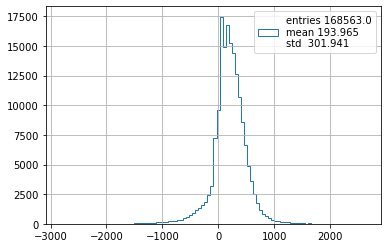

In [96]:
sel = df['T4-RL'].values
pltext.hist(df[sel]['T1-T0_time'], 100);

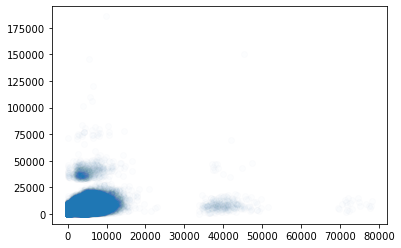

In [97]:
plt.scatter(df['ACT_g1_charge'], df['ACT_g2_charge'], alpha = 0.01);

In [79]:
df = brbtools.df_extend(df)

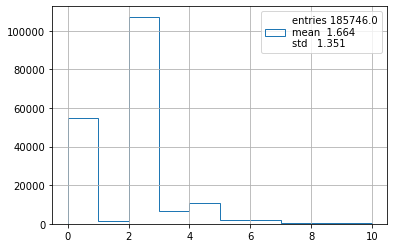

In [82]:
pltext.hist(df['TOF_nhits'], 10, (0, 10));

In [117]:
sel_t4   = df['T4-RL'].values # has a hit in T4
sel_tof  = df['TOF_nhits'] > 2
sel_time = ((df['T1_time'] >0) & (df['T0_time'] >0))
sel_act4 = ((df['ACT4-L_nhits'] == 1) & (df['ACT4-R_nhits'] == 1))
veto_e    = df['ACT_g1_charge'] == 0.

In [118]:
sel = (sel_t4) & (sel_tof) & (sel_time) & (sel_act4)

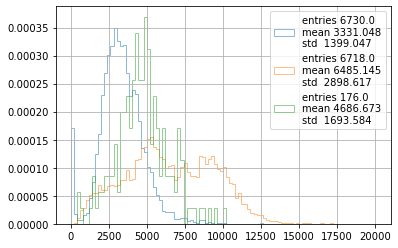

In [120]:
pltext.hist(df[sel]['ACT_g1_charge'], 100, alpha = 0.5, range = (0, 20e3), density = True)
pltext.hist(df[sel]['ACT_g2_charge'], 100, alpha = 0.5, range = (0, 20e3), density = True);
pltext.hist(df[sel & veto_e]['ACT_g2_charge'], 100, alpha = 0.5, range = (0, 20e3), density = True);

In [138]:
sel_t0 = ut.in_range(df['T0_time'], (2250, 2300));

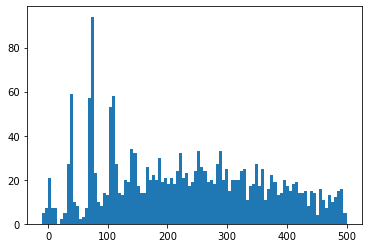

In [142]:
plt.hist(df[sel & sel_t0]['T1-T0_time'], 100, (-10, 500));

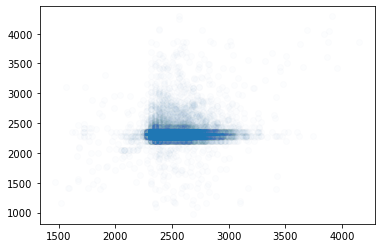

In [146]:
plt.scatter(df[sel]['T1_time'], df[sel]['T0_time'], alpha = 0.01);

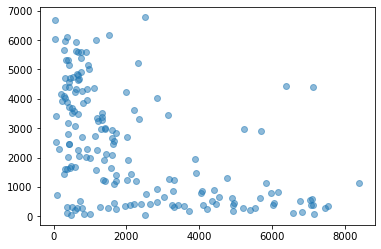

In [121]:
plt.scatter(df[sel & veto_e]['ACT4-R_charge'], df[sel & veto_e]['ACT4-L_charge'], alpha = 0.5);

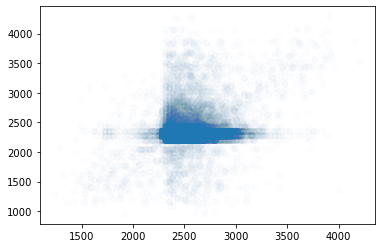

In [104]:
sel = (sel_t4) & (sel_tof) & (sel_time)
plt.scatter(df[sel]['T1_time'], df[sel]['T0_time'], alpha = 0.01);

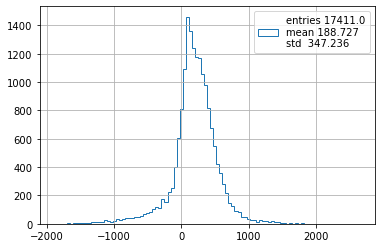

In [105]:
pltext.hist(df[sel]['T1-T0_time'], 100);

In [78]:
for key in df.columns: print(key)

Unnamed: 0
evt
ACT0-L_nhits
ACT0-L_charge
ACT0-L_time
ACT0-R_nhits
ACT0-R_charge
ACT0-R_time
ACT1-L_nhits
ACT1-L_charge
ACT1-L_time
ACT1-R_nhits
ACT1-R_charge
ACT1-R_time
NC_nhits
NC_charge
NC_time
ACT2-L_nhits
ACT2-L_charge
ACT2-L_time
ACT2-R_nhits
ACT2-R_charge
ACT2-R_time
ACT3-L_nhits
ACT3-L_charge
ACT3-L_time
ACT3-R_nhits
ACT3-R_charge
ACT3-R_time
ACT4-L_nhits
ACT4-L_charge
ACT4-L_time
ACT4-R_nhits
ACT4-R_charge
ACT4-R_time
ACT5-L_nhits
ACT5-L_charge
ACT5-L_time
ACT5-R_nhits
ACT5-R_charge
ACT5-R_time
T1-0L_nhits
T1-0L_charge
T1-0L_time
T1-0R_nhits
T1-0R_charge
T1-0R_time
T1-1L_nhits
T1-1L_charge
T1-1L_time
T1-1R_nhits
T1-1R_charge
T1-1R_time
HC-0_nhits
HC-0_charge
HC-0_time
HC-1_nhits
HC-1_charge
HC-1_time
Trigger_nhits
Trigger_charge
Trigger_time
Lemo-1_nhits
Lemo-1_charge
Lemo-1_time
Lemo-2_nhits
Lemo-2_charge
Lemo-2_time
Lemo-3_nhits
Lemo-3_charge
Lemo-3_time
Lemo-4_nhits
Lemo-4_charge
Lemo-4_time
Lemo-5_nhits
Lemo-5_charge
Lemo-5_time
Lemo-6_nhits
Lemo-6_charge
Lemo-6_time
Lase

### Time studies

['T0-0L_nhits', 'T0-1L_nhits', 'T1-0L_nhits', 'T1-1L_nhits', 'T0-0R_nhits', 'T0-1R_nhits', 'T1-0R_nhits', 'T1-1R_nhits', 'T0-0L_charge', 'T0-1L_charge', 'T1-0L_charge', 'T1-1L_charge', 'T0-0R_charge', 'T0-1R_charge', 'T1-0R_charge', 'T1-1R_charge', 'T0-0L_time', 'T0-1L_time', 'T1-0L_time', 'T1-1L_time', 'T0-0R_time', 'T0-1R_time', 'T1-0R_time', 'T1-1R_time']


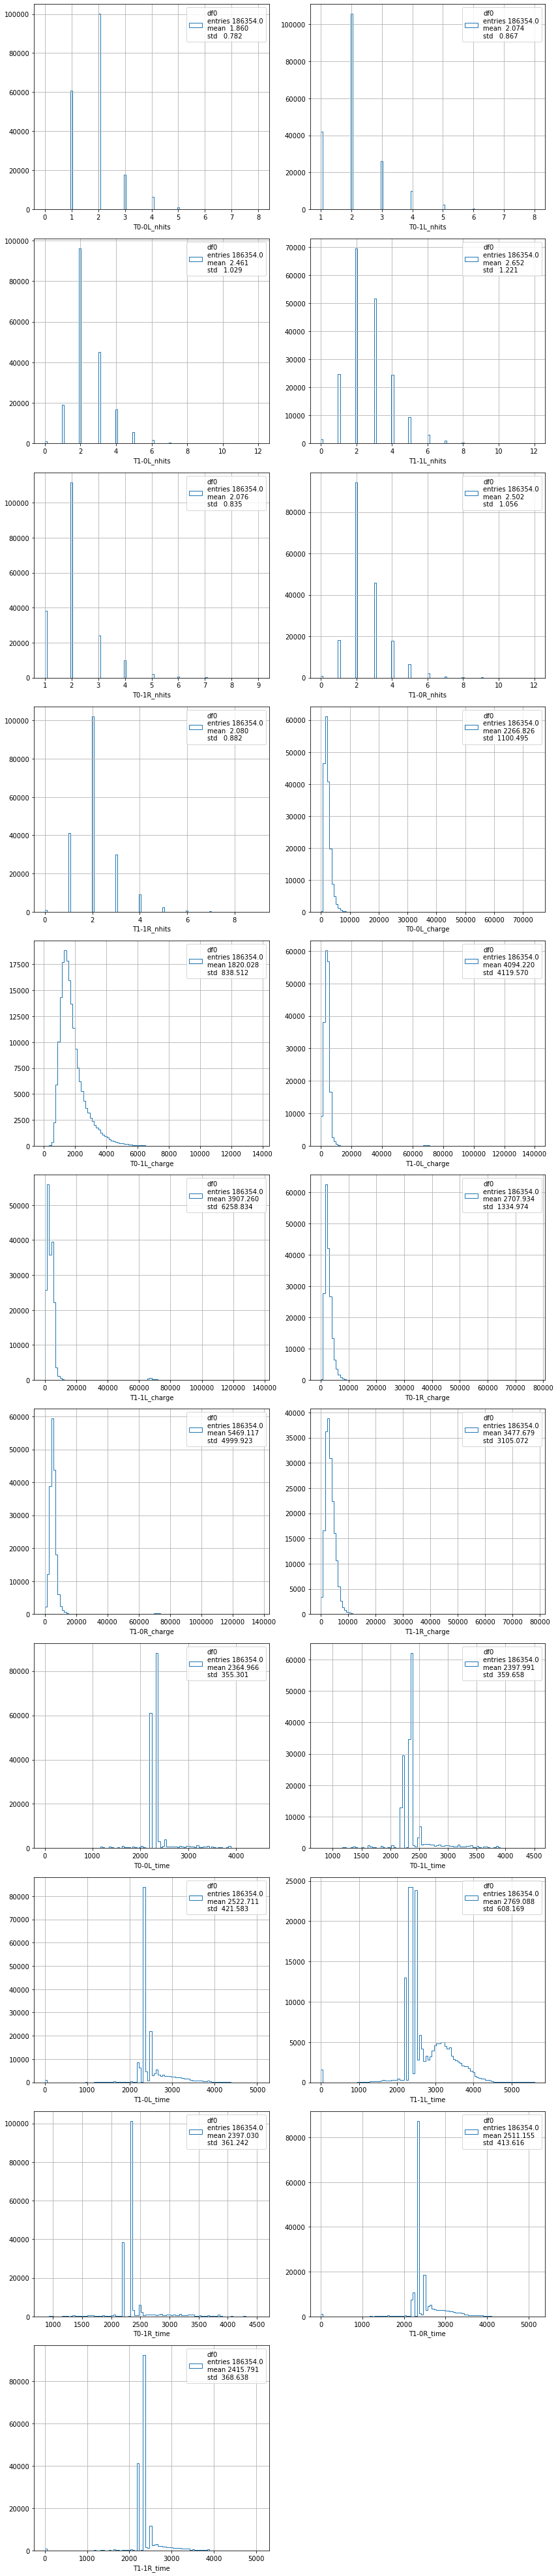

In [28]:
sens = ['T0-0', 'T0-1', 'T1-0', 'T1-1']
vars = ['L_nhits', 'R_nhits', 'L_charge', 'R_charge', 'L_time', 'R_time']

labels = [sen + var for var in vars for sen in sens]
print(labels)
labels = [label for label in labels if label in list(df.columns)]
pltext.df_inspect(df, labels)

In [52]:
def df_extend(df):

    def _operate(sens, vars, oper = np.sum):
        labs = [sen + var for var in vars for sen in sens]
        vv = oper([df[lab].values for lab in labs], axis = 0)
        return vv
    
    df['T0_time'] = _operate(['T0-0','T0-1'], ['L_time',], np.mean) ## ??? WHY THERE is not R_time ???
    df['T1_time'] = _operate(['T1-0','T1-1'], ['L_time','R_time'], np.mean)
    df['T1-T0_time'] = df['T1_time'] - df['T0_time']

    for i in range(6):
        df['ACT'+str(i)+'_charge'] = _operate(['ACT'+str(i)+'-',], ['L_charge', 'R_charge'], np.mean)

    df['ACT_g1_charge'] = np.sum([df['ACT'+str(i)+'_charge'] for i in (0, 1, 2)], axis = 0)
    df['ACT_g2_charge'] = np.sum([df['ACT'+str(i)+'_charge'] for i in (3, 4, 5)], axis = 0)


    return df
#vv = np.mean([df[lab] for lab in labs], axis = 0)


In [ ]:
df = df_extend(df)

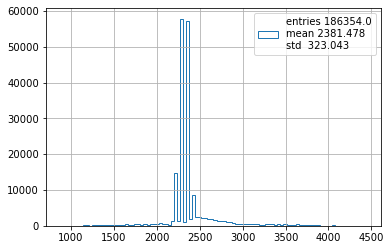

In [54]:
df = df_extend(df)
pltext.hist(df['T0time'], 100);

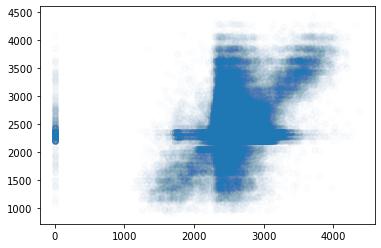

In [59]:
plt.scatter(df['T1_time'], df['T0_time'], alpha = 0.01);

In [ ]:
def extend_df(df):
    sens = ['T0-0', 'T0-1']
    vars = ['L_time', 'R_time']
    df['T0time'] = np.mean([df[sen + var] for sen in sens for var in vars)

    